In [1]:
# Use this file to generate networks from csv files

import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

Load csv

In [2]:
# To create a graph from a particular dataset, change the path to the csv file

df = pd.read_csv('./csv/PensionReform.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9997 entries, 0 to 9996
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   9997 non-null   int64  
 1   created_at           9997 non-null   object 
 2   author_id            9997 non-null   int64  
 3   in_reply_to_user_id  5831 non-null   float64
 4   likert_scale_Q1      9997 non-null   int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 390.6+ KB


In [3]:
first_date = df['created_at'].min()
last_date = df['created_at'].max()

print(f"First date: {first_date}")
print(f"Last date: {last_date}")

First date: 2024-06-22
Last date: 2024-07-19


In [4]:
def plot_graph(df, start_date=first_date, end_date=last_date):
    # Filter by date
    df_filtered = df[(df['created_at'] >= start_date) & (df['created_at'] <= end_date)]
    df_filtered = df_filtered.dropna(subset=['in_reply_to_user_id'])
    
    # Create directed graph
    G = nx.from_pandas_edgelist(df_filtered, 'author_id', 'in_reply_to_user_id', create_using=nx.DiGraph())
    
    # Draw the graph
    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=500, node_color='skyblue', font_size=7, arrows=True)
    plt.title(f"Graph from {start_date} to {end_date}")
    plt.show()

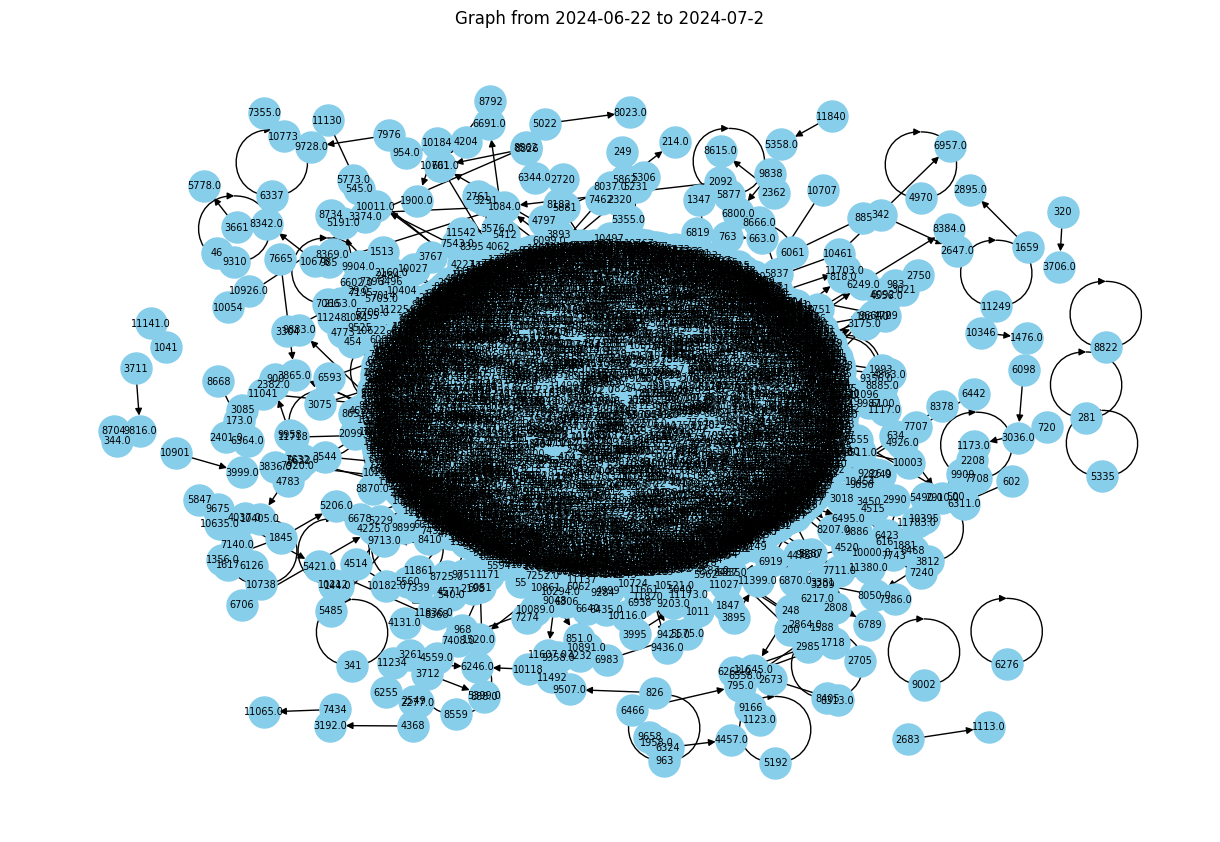

In [5]:
plot_graph(df,'2024-06-22' ,'2024-07-2')